In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
import os 
import numpy as np 

# Testing the proteomics data from Zsang et.al as a validation set

In [32]:
train_df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/tasks/HGSOC_multimodal_protein_and_phospho.csv")
test_df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/tasks/TCGA_platinum_reposnce_test_set.csv")

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (8807,8811) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
intersecting_list = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']


X_train = train_df[intersecting_list]
X_test =  test_df[intersecting_list]
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = train_df['label']
y_test = test_df['label']
# then plot all 3... and split by tissue types.. 

### Create some visualizations.

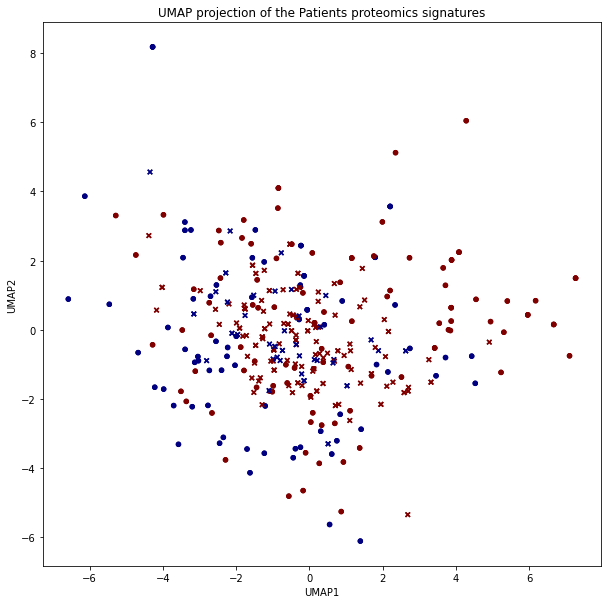

In [34]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# reducer = umap.UMAP()
reducer = PCA(n_components=2)

train_embedding = reducer.fit_transform(X_train)
test_embedding = reducer.transform(X_test)


plt.figure(figsize=(10, 10))  # You can adjust the size (width, height) as needed

plt.scatter(train_embedding[:, 0], train_embedding[:, 1], c=y_train, cmap='jet', s=20)
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], c=y_test, cmap='jet', s=20,  marker='x')


plt.title('UMAP projection of the Patients proteomics signatures', fontsize=12)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# plt.colorbar()
plt.show()

In [35]:
for i in range(X_train.shape[1]):  # Assuming both have the same number of columns
    mean1, std1 = np.mean(X_train[:, i]), np.std(X_train[:, i])
    mean2, std2 = np.mean(X_test[:, i]), np.std(X_test[:, i])
    print(f"Column {i}: Dataset1 - Mean: {mean1:.2f}, Std: {std1:.2f}; Dataset2 - Mean: {mean2:.2f}, Std: {std2:.2f}")

Column 0: Dataset1 - Mean: 0.04, Std: 0.97; Dataset2 - Mean: 0.03, Std: 1.07
Column 1: Dataset1 - Mean: -0.06, Std: 1.03; Dataset2 - Mean: -0.07, Std: 0.96
Column 2: Dataset1 - Mean: -0.04, Std: 1.03; Dataset2 - Mean: -0.05, Std: 0.93
Column 3: Dataset1 - Mean: -0.02, Std: 0.98; Dataset2 - Mean: -0.03, Std: 0.98
Column 4: Dataset1 - Mean: -0.04, Std: 1.02; Dataset2 - Mean: -0.04, Std: 1.05
Column 5: Dataset1 - Mean: -0.06, Std: 1.02; Dataset2 - Mean: -0.13, Std: 1.01
Column 6: Dataset1 - Mean: -0.08, Std: 1.04; Dataset2 - Mean: 0.04, Std: 1.04
Column 7: Dataset1 - Mean: -0.07, Std: 1.02; Dataset2 - Mean: -0.02, Std: 1.00
Column 8: Dataset1 - Mean: -0.07, Std: 0.96; Dataset2 - Mean: -0.05, Std: 1.00
Column 9: Dataset1 - Mean: 0.04, Std: 1.02; Dataset2 - Mean: -0.03, Std: 1.03
Column 10: Dataset1 - Mean: -0.07, Std: 0.96; Dataset2 - Mean: -0.07, Std: 0.99
Column 11: Dataset1 - Mean: -0.06, Std: 0.98; Dataset2 - Mean: 0.10, Std: 0.97
Column 12: Dataset1 - Mean: -0.07, Std: 1.02; Dataset2 

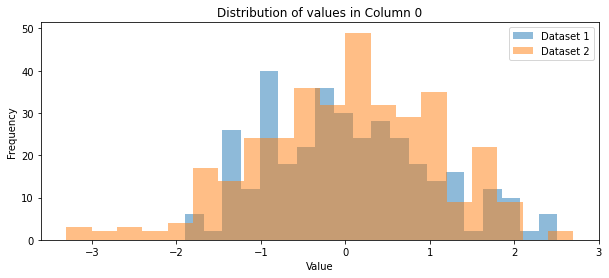

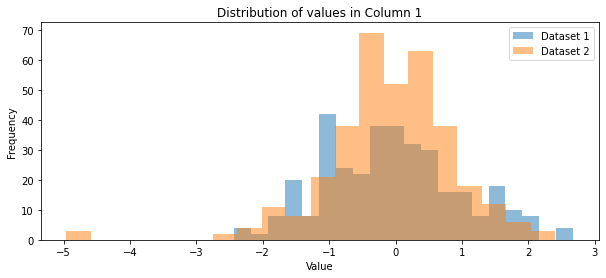

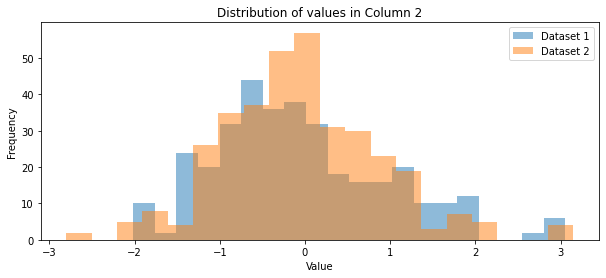

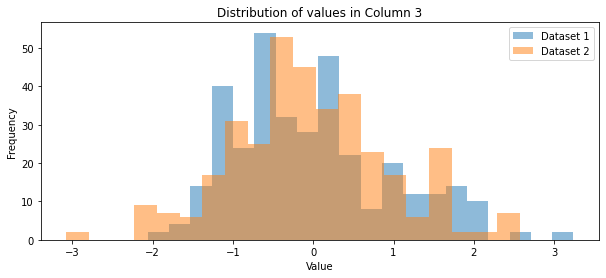

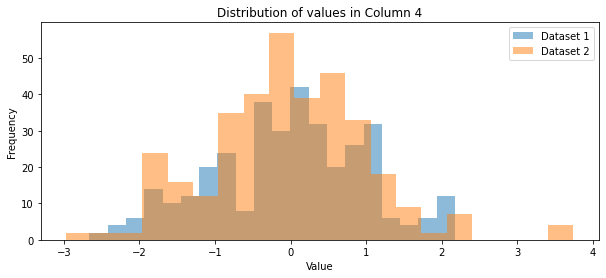

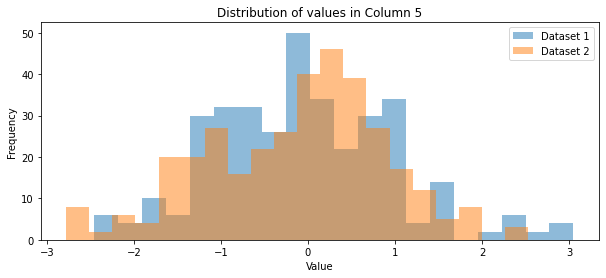

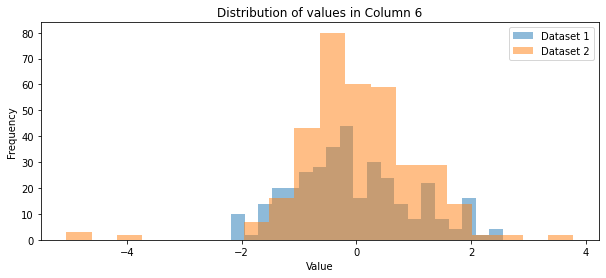

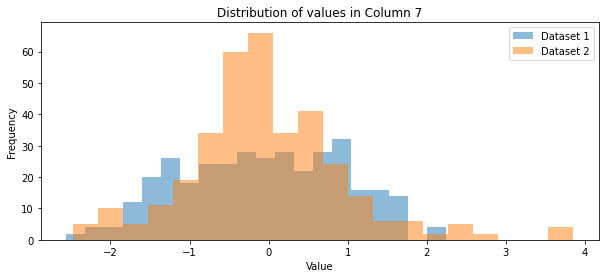

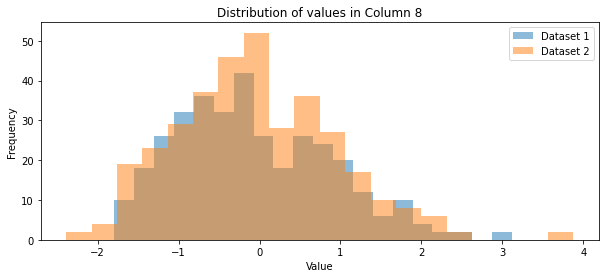

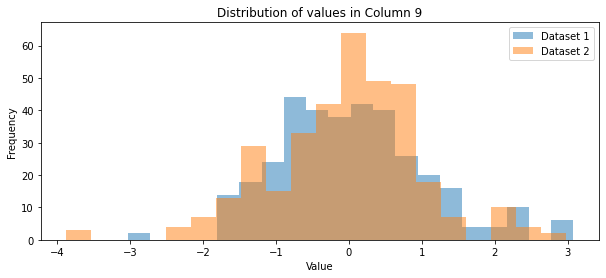

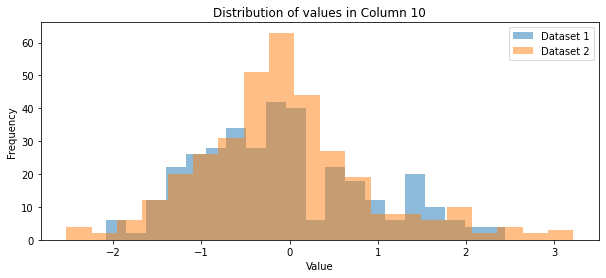

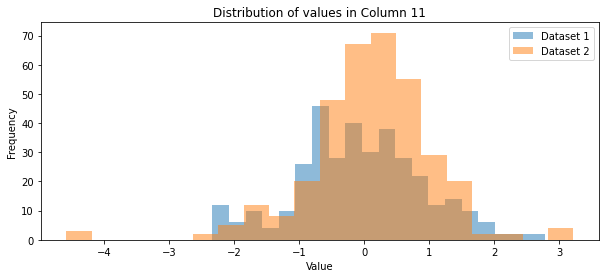

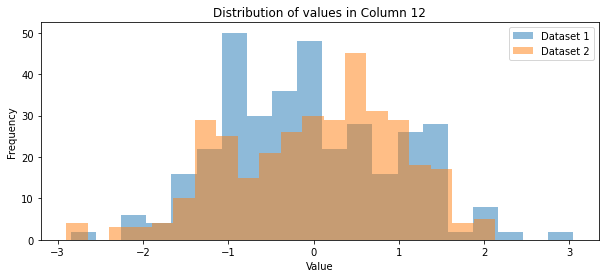

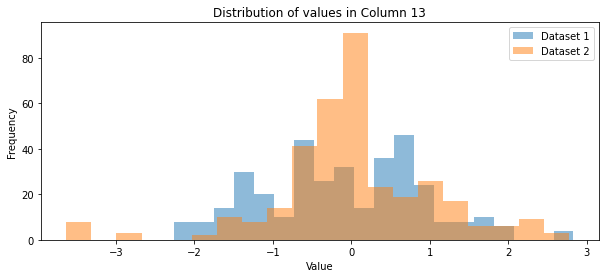

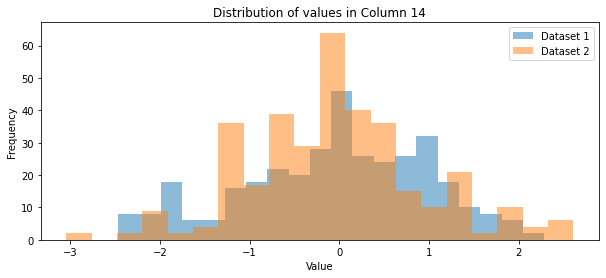

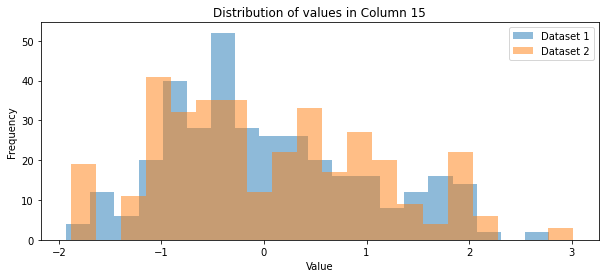

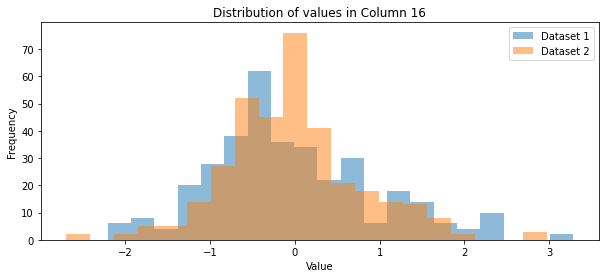

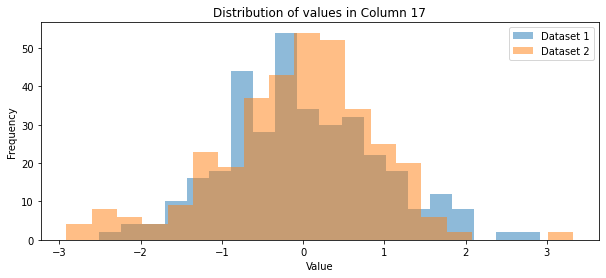

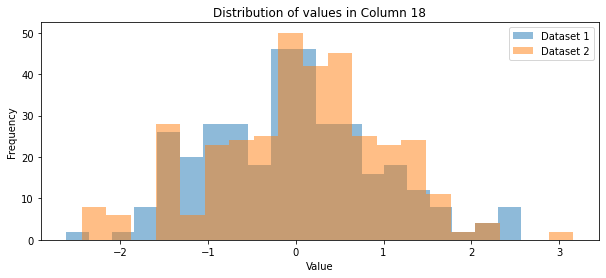

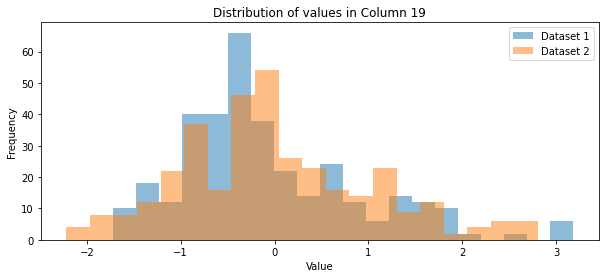

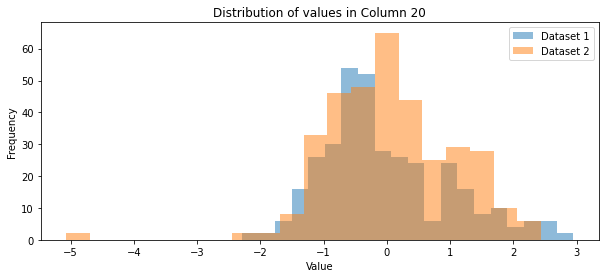

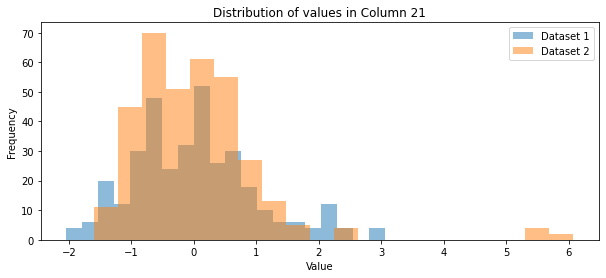

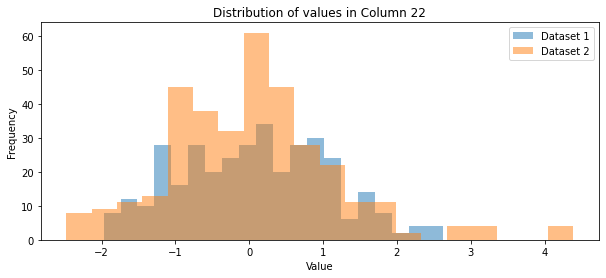

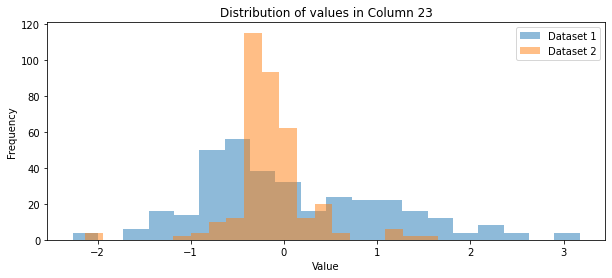

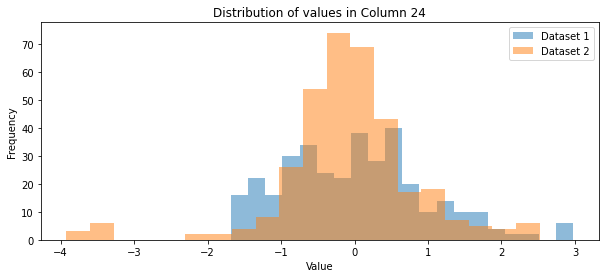

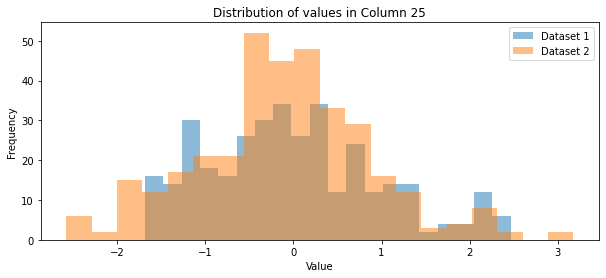

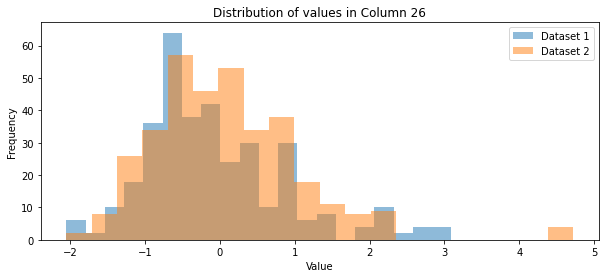

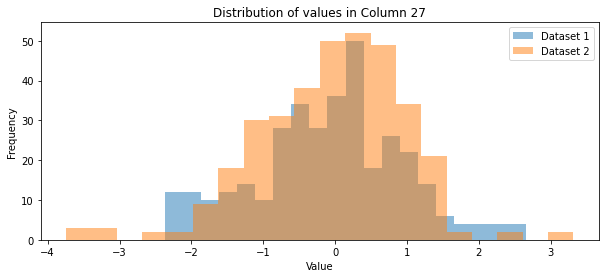

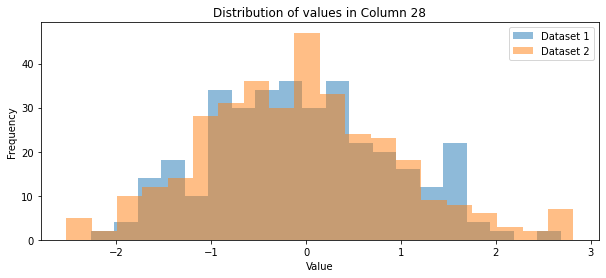

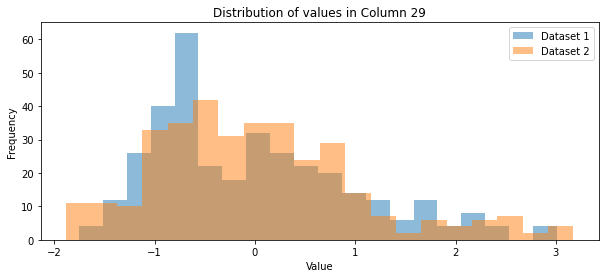

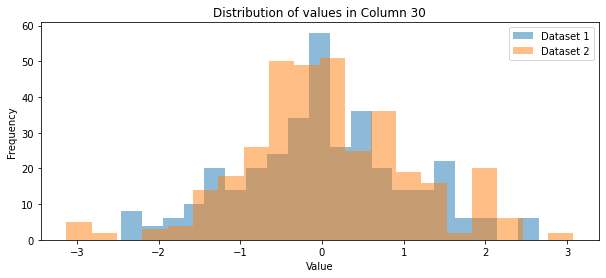

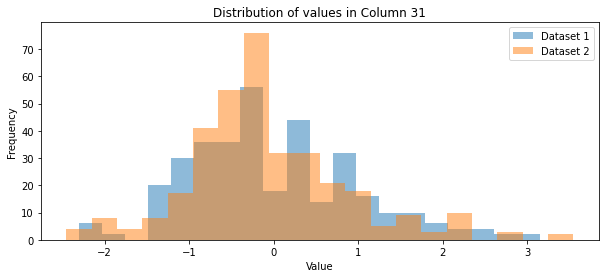

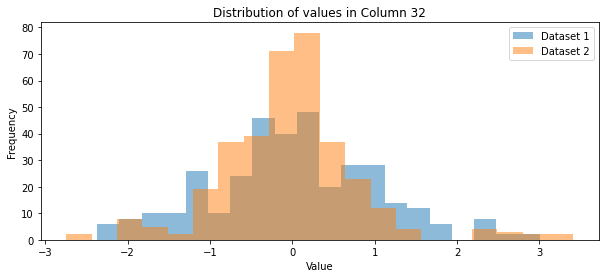

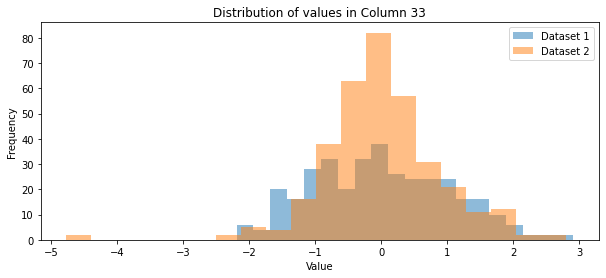

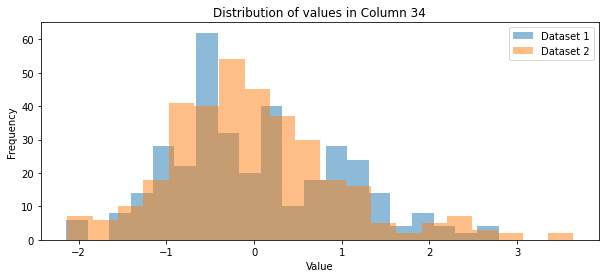

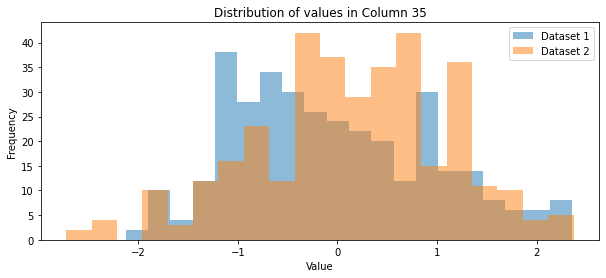

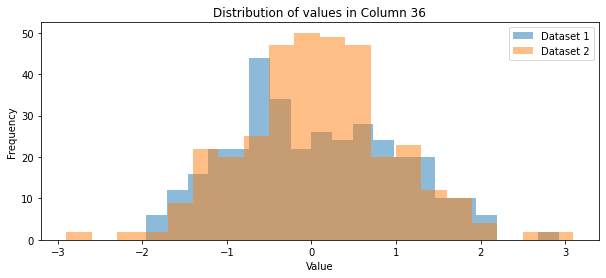

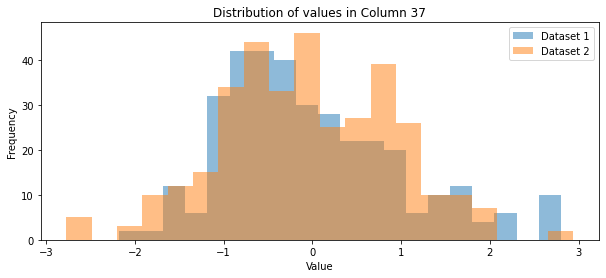

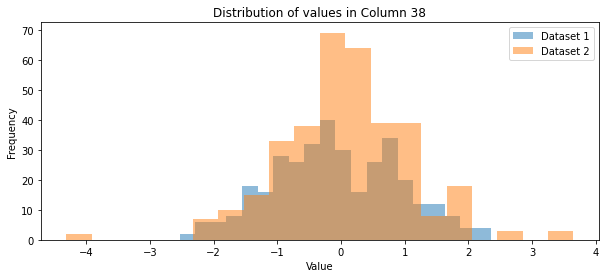

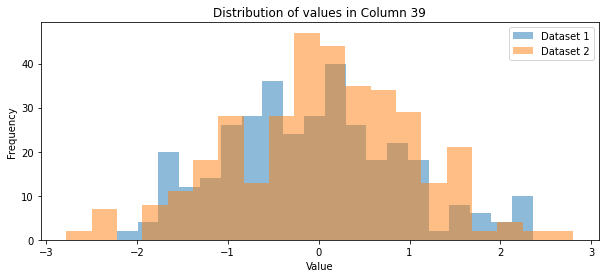

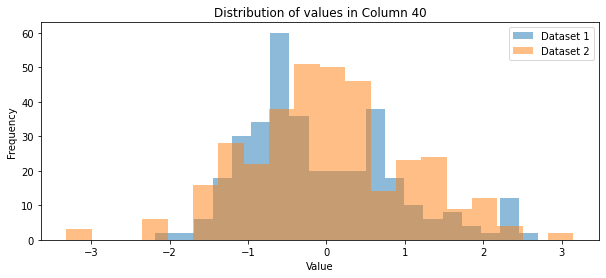

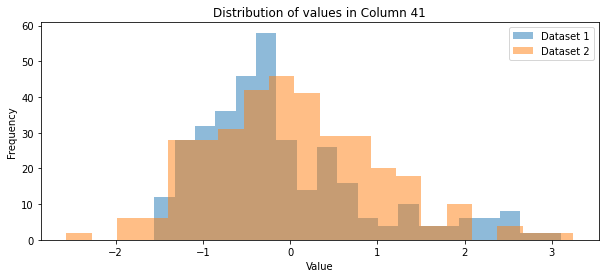

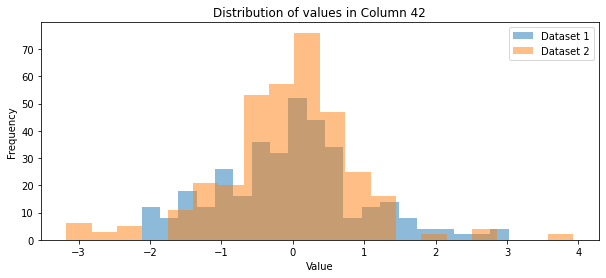

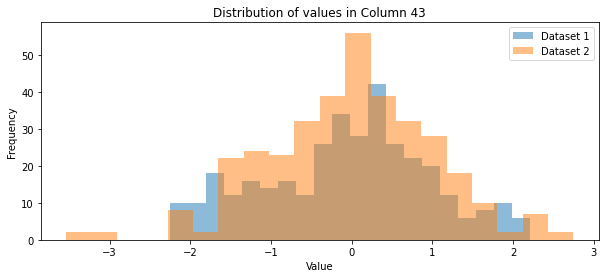

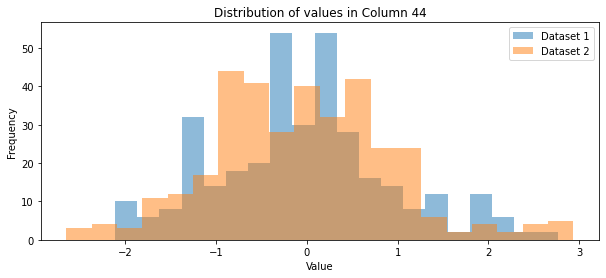

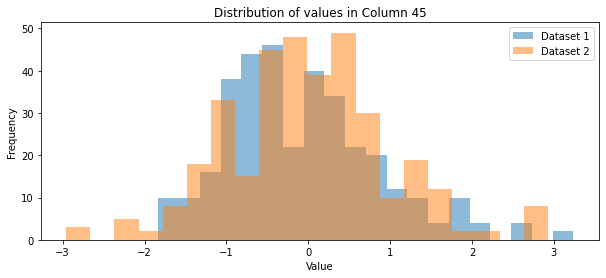

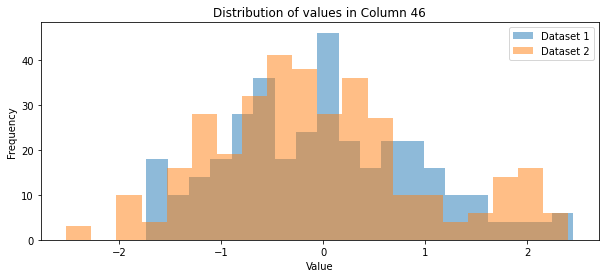

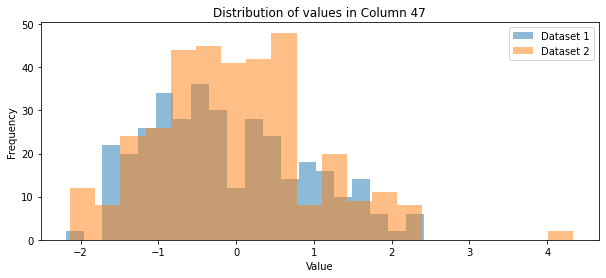

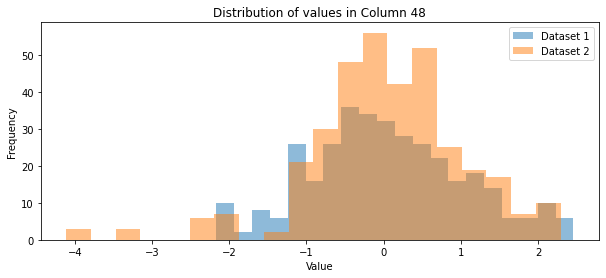

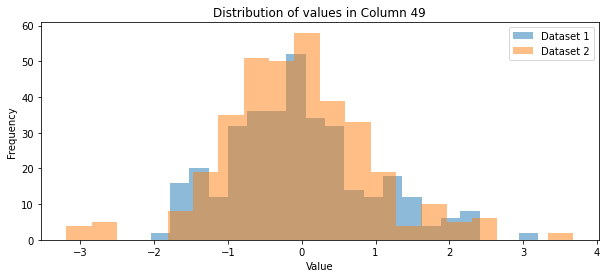

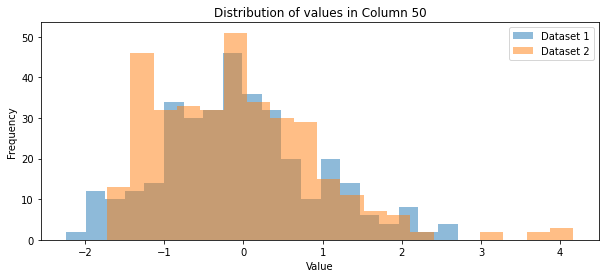

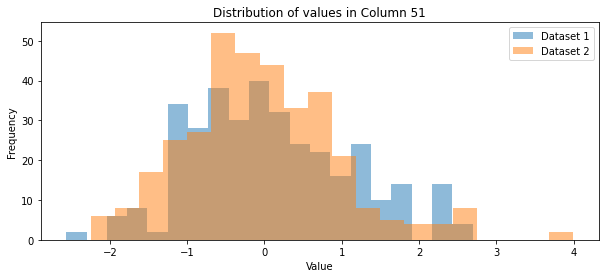

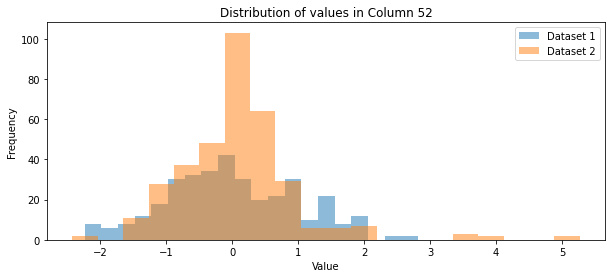

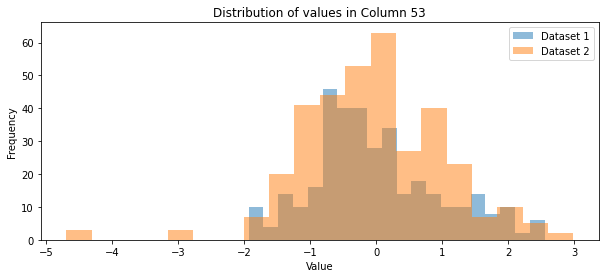

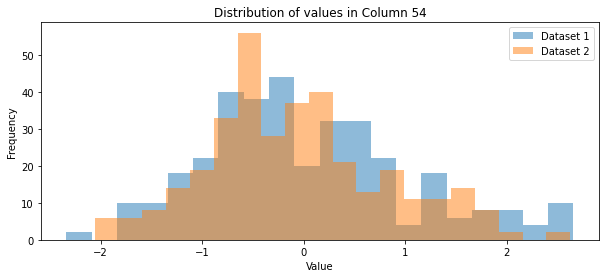

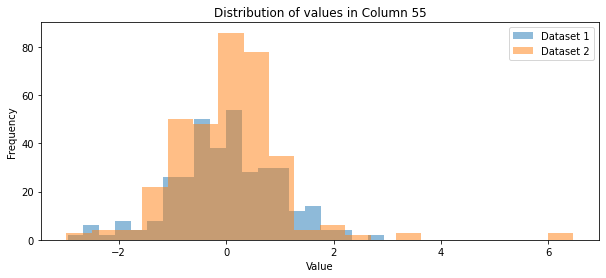

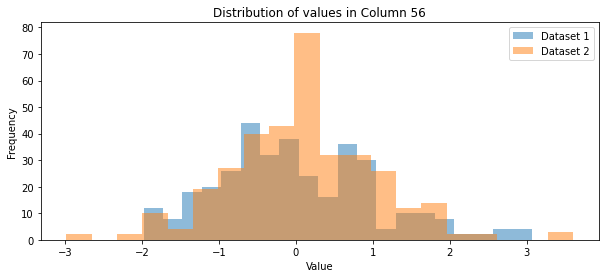

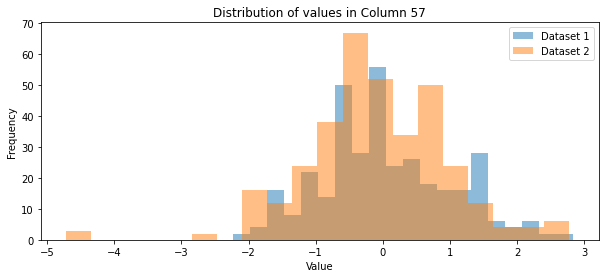

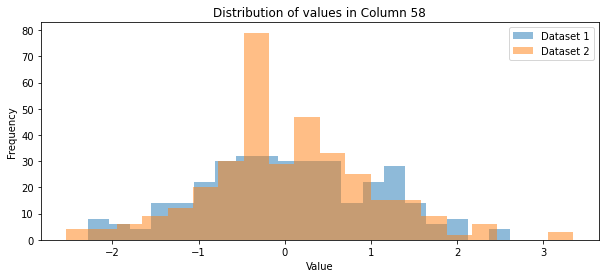

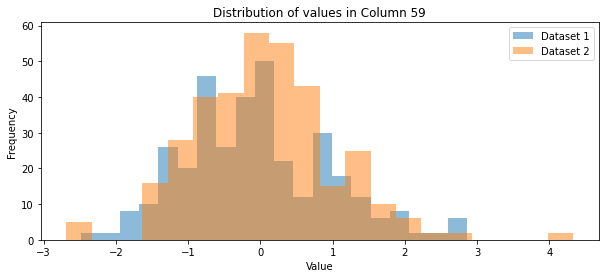

In [36]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10, 4))
    plt.hist(X_train[:, i], bins=20, alpha=0.5, label='Dataset 1')
    plt.hist(X_test[:, i], bins=20, alpha=0.5, label='Dataset 2')
    plt.title(f'Distribution of values in Column {i}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [37]:
from scipy.stats import ks_2samp

for i in range(X_train.shape[1]):
    stat, p = ks_2samp(X_train[:, i], X_test[:, i])
    print(f"Column {i}: KS Statistic: {stat:.3f}, P-Value: {p:.3f}")


Column 0: KS Statistic: 0.083, P-Value: 0.178
Column 1: KS Statistic: 0.126, P-Value: 0.008
Column 2: KS Statistic: 0.109, P-Value: 0.031
Column 3: KS Statistic: 0.101, P-Value: 0.059
Column 4: KS Statistic: 0.060, P-Value: 0.551
Column 5: KS Statistic: 0.080, P-Value: 0.210
Column 6: KS Statistic: 0.124, P-Value: 0.010
Column 7: KS Statistic: 0.135, P-Value: 0.003
Column 8: KS Statistic: 0.072, P-Value: 0.331
Column 9: KS Statistic: 0.089, P-Value: 0.126
Column 10: KS Statistic: 0.089, P-Value: 0.126
Column 11: KS Statistic: 0.152, P-Value: 0.001
Column 12: KS Statistic: 0.144, P-Value: 0.001
Column 13: KS Statistic: 0.175, P-Value: 0.000
Column 14: KS Statistic: 0.126, P-Value: 0.008
Column 15: KS Statistic: 0.118, P-Value: 0.016
Column 16: KS Statistic: 0.135, P-Value: 0.003
Column 17: KS Statistic: 0.089, P-Value: 0.126
Column 18: KS Statistic: 0.121, P-Value: 0.013
Column 19: KS Statistic: 0.129, P-Value: 0.006
Column 20: KS Statistic: 0.164, P-Value: 0.000
Column 21: KS Statistic